# Evaluation of our final models (translation part) 

## Includes: 
- 3 Translation models were tested: only 3 Layers trained, only 6 Layers trained, Full model trained
- Translation stats


1. Translation stats for the different translation models. 
    - 5 Translation datasets: Training data, testing data long, testing data short and testing data long with correct sentences and testing data shortwith correct sentences
    - The tree trained models are compared on a number of statistics based and on all 4 datasets
    - Grouped by models aswell as grouped by dataset (same values, but improves understanding) 
    
### Explanations: 
    
    
#### Datasets:
    - Format: Sentence=Translation Sentence=Translation<|endoftext|>   
    - All datasets are split on EOS tokens. 
    - All datasets exclude sentences with over 100 mistakes ---> trash filter
    - Sentence pair --> Sentence=Translation
    - train: a sample of the training data (700 characters for one sentence pair max. This filter is active on the real training data aswell)
    - test_700: testing data with a max length of a 700 characters for one sentence pair
    - test_long: testing data with no max length
    - test_nf_lrong: testing data which includes correct sentences also and has no max length filter
    - test_nf_700: testing data which includes correct sentences also and with a max length of 700 characters per sentence pair
    

#### Translation stats:
    - Correct Trans: The generated text is equal to the correct translation
    - Trans included: The correct translation was included in the generated text (still additional words) 
    - Rep included: The generated text is included in the condition
    - Real in cond: The real translation is included in the condition 
    - Len Trans = Real: The length of the generated text is equal to the length of the correct translation
    - Length Trans: Length of the translation 
    - Length Real: Length of the correct translation
    - Average Levenstein Real/Trans: Average Levenshtein Distance between the generated text and the correct translation
    

### Important Observations:

- The number of layers is pretty much linear correlated with the performance of the model. 
- While all models work, it seems like we need to full model after all for the maximum performance...
- Longer sentences are still working fine. 
- Introducing correct sentences is not a problem for the model. 

## Load libs

In [1]:
# Set the GPU for training
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

In [2]:
import torch
import pickle
from transformers import GPT2Tokenizer, GPT2LMHeadModel, modeling_utils, GPT2Config, modeling_gpt2, GPT2Model, GPT2PreTrainedModel, GPT2Config
import copy
import operator
import json
import numpy as np
import pandas as pd
import language_check
from functools import reduce
import difflib
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

from utility import *

## Load all generated samples

In [3]:
data = load_datasets()
trans = load_data()

## Calculate error statistics

In [4]:
calculate_model(trans,data)

# Translation comparisons

## Model based:

In [5]:
l3 = reload("3")
l6 = reload("6")
lf = reload("full")

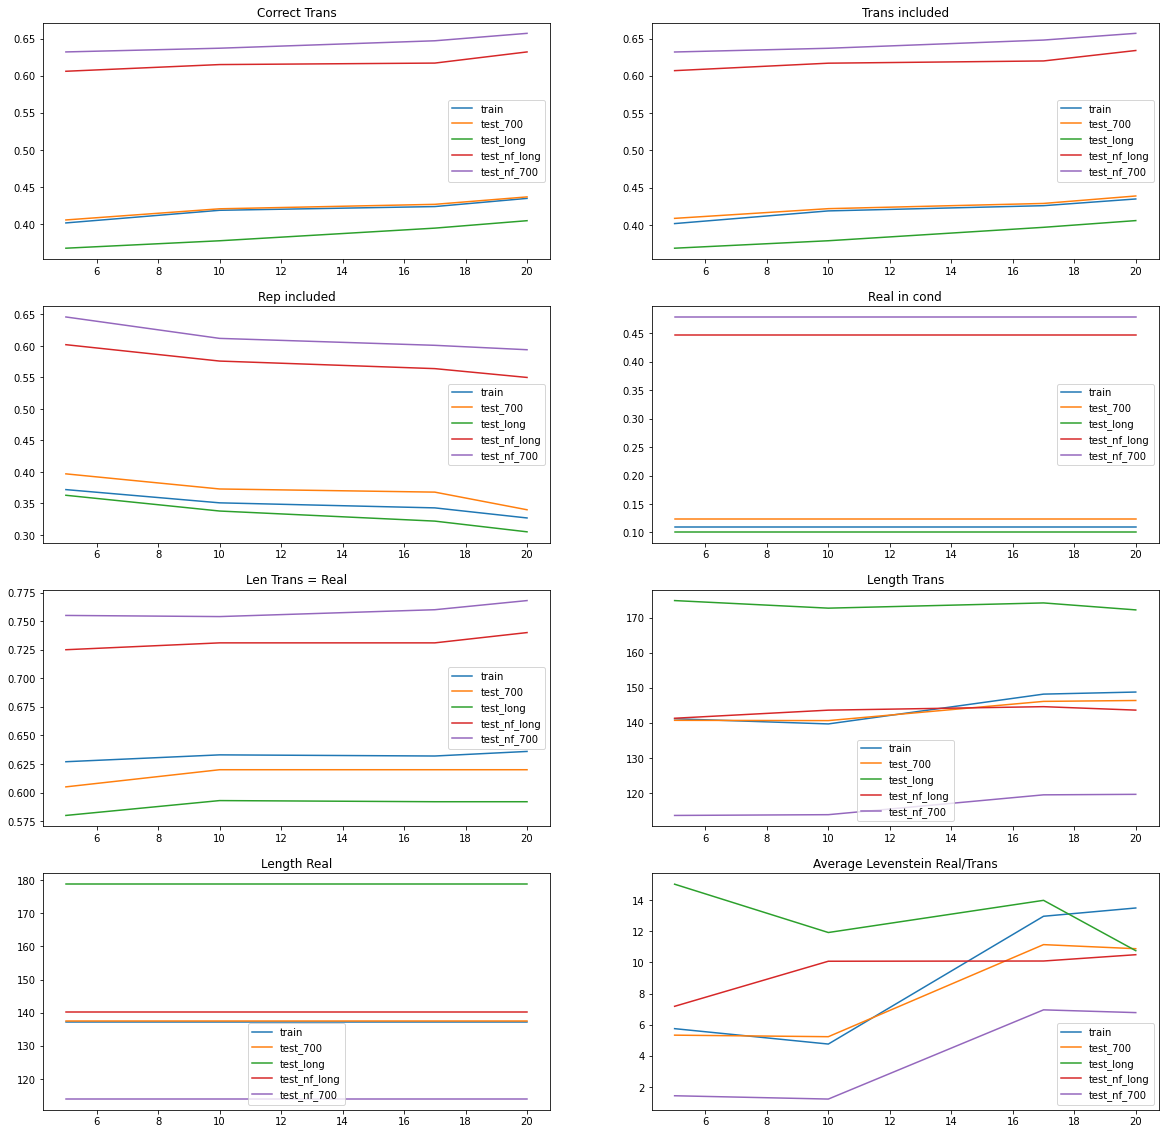

In [6]:
format_reloads_model(l3)   # 0,1,2,3----> 5,10,17,20

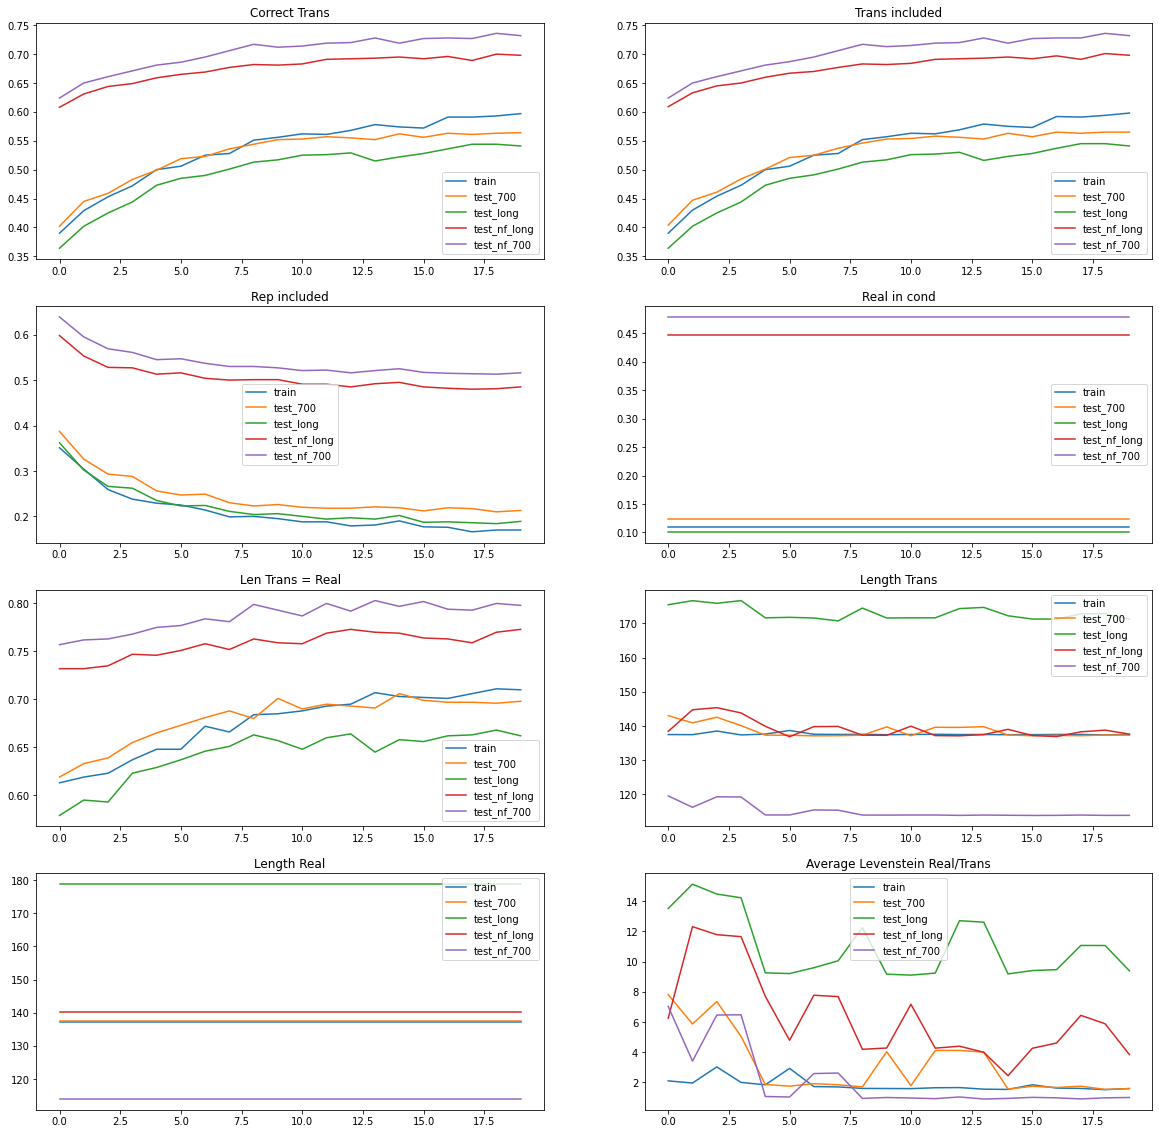

In [7]:
format_reloads_model(l6)

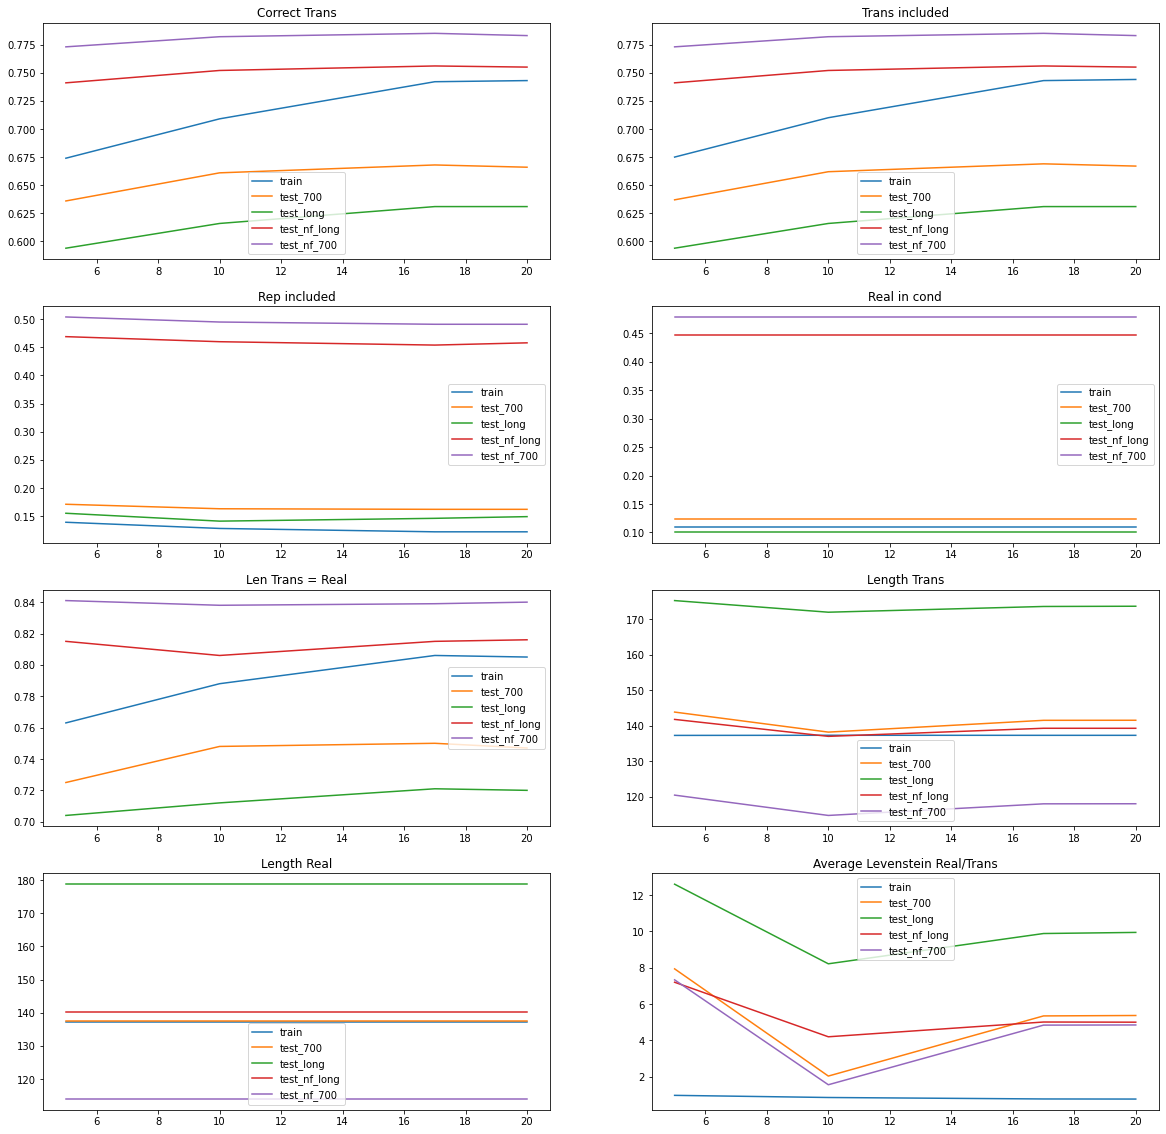

In [8]:
format_reloads_model(lf)

## Stat based

In [9]:
l3 = reload("3")
l6 = reload("6")
lf = reload("full")

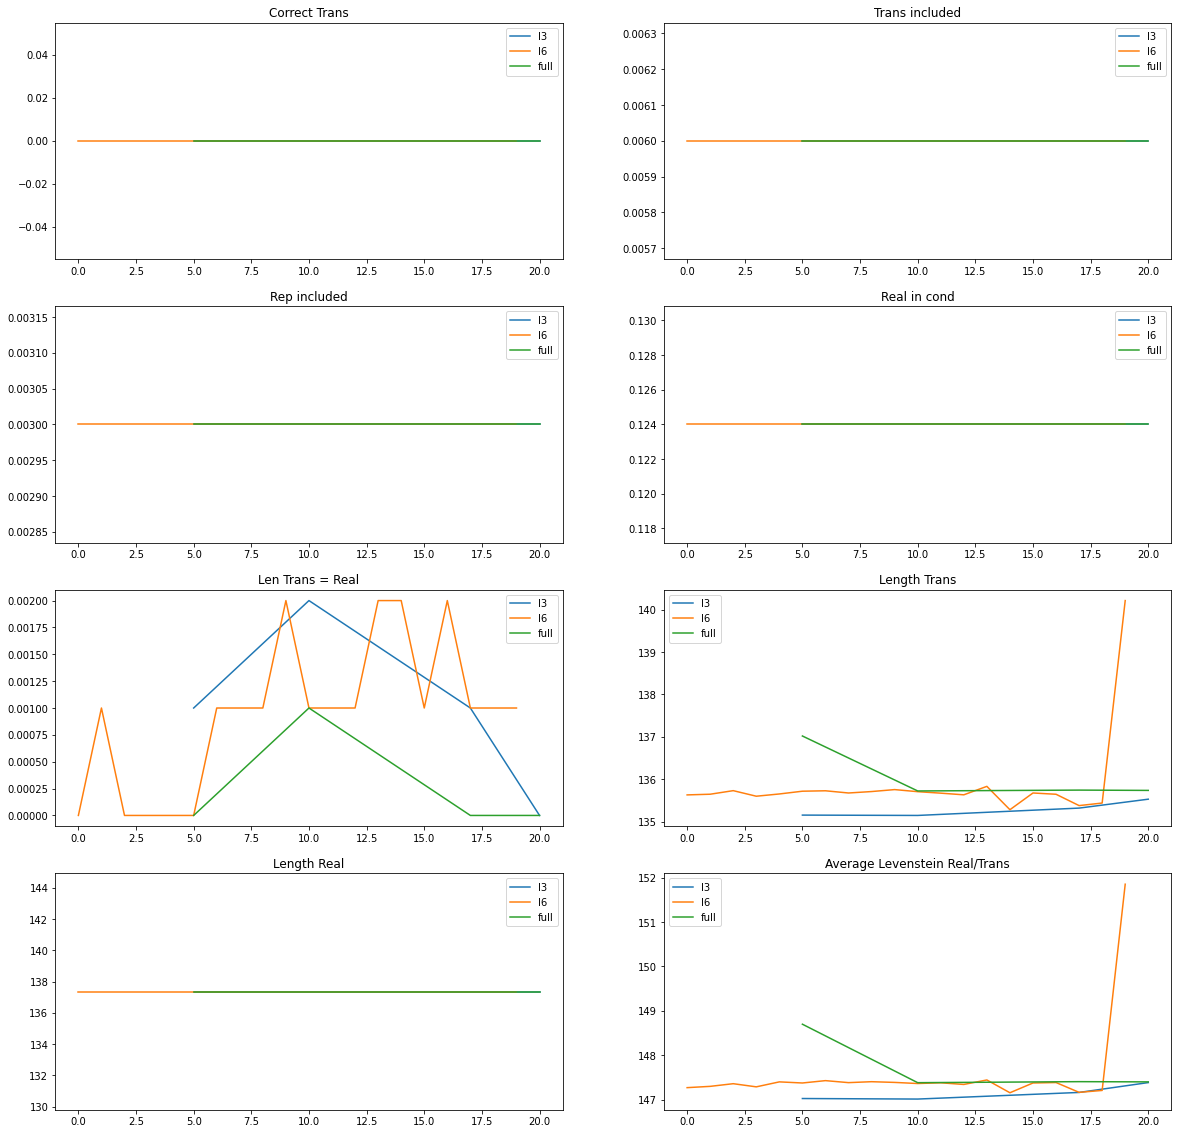

In [10]:
format_reloads_dataset(l3,l6,lf,"test_700")

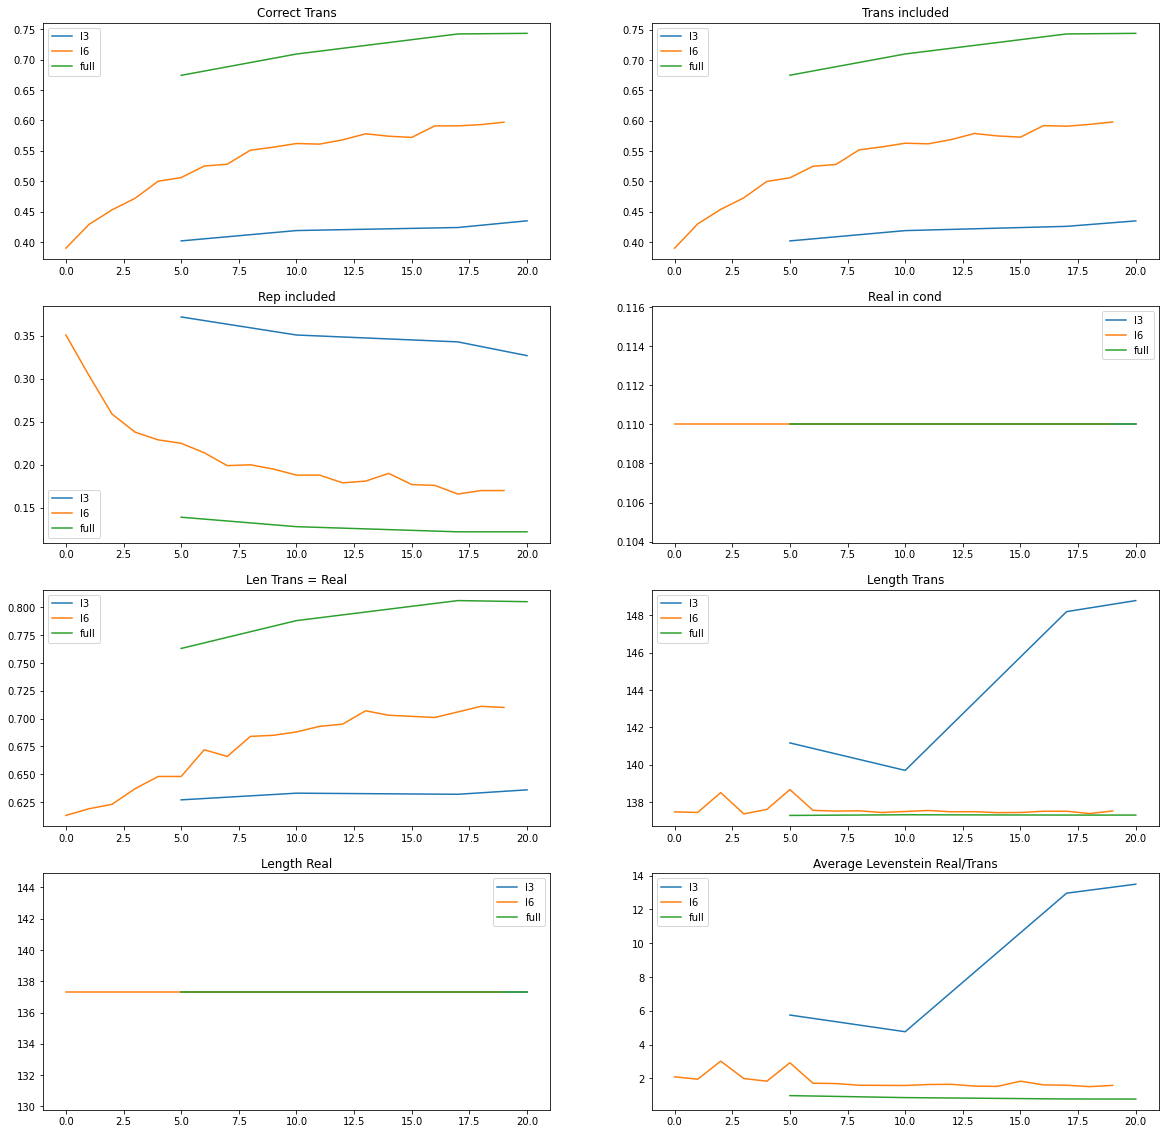

In [11]:
format_reloads_dataset(l3,l6,lf,"train")

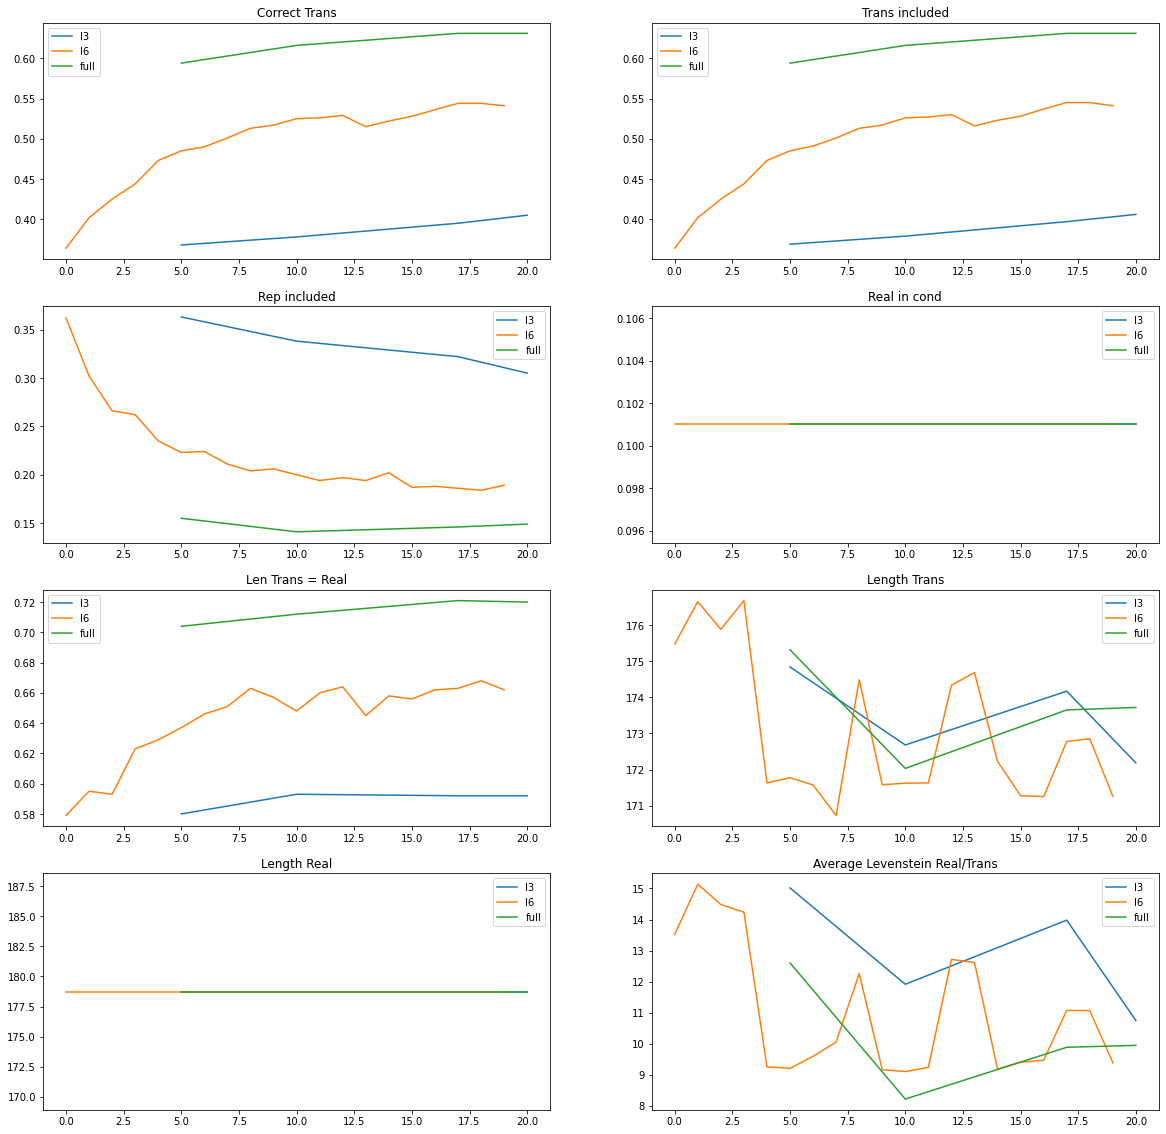

In [12]:
format_reloads_dataset(l3,l6,lf,"test_long")

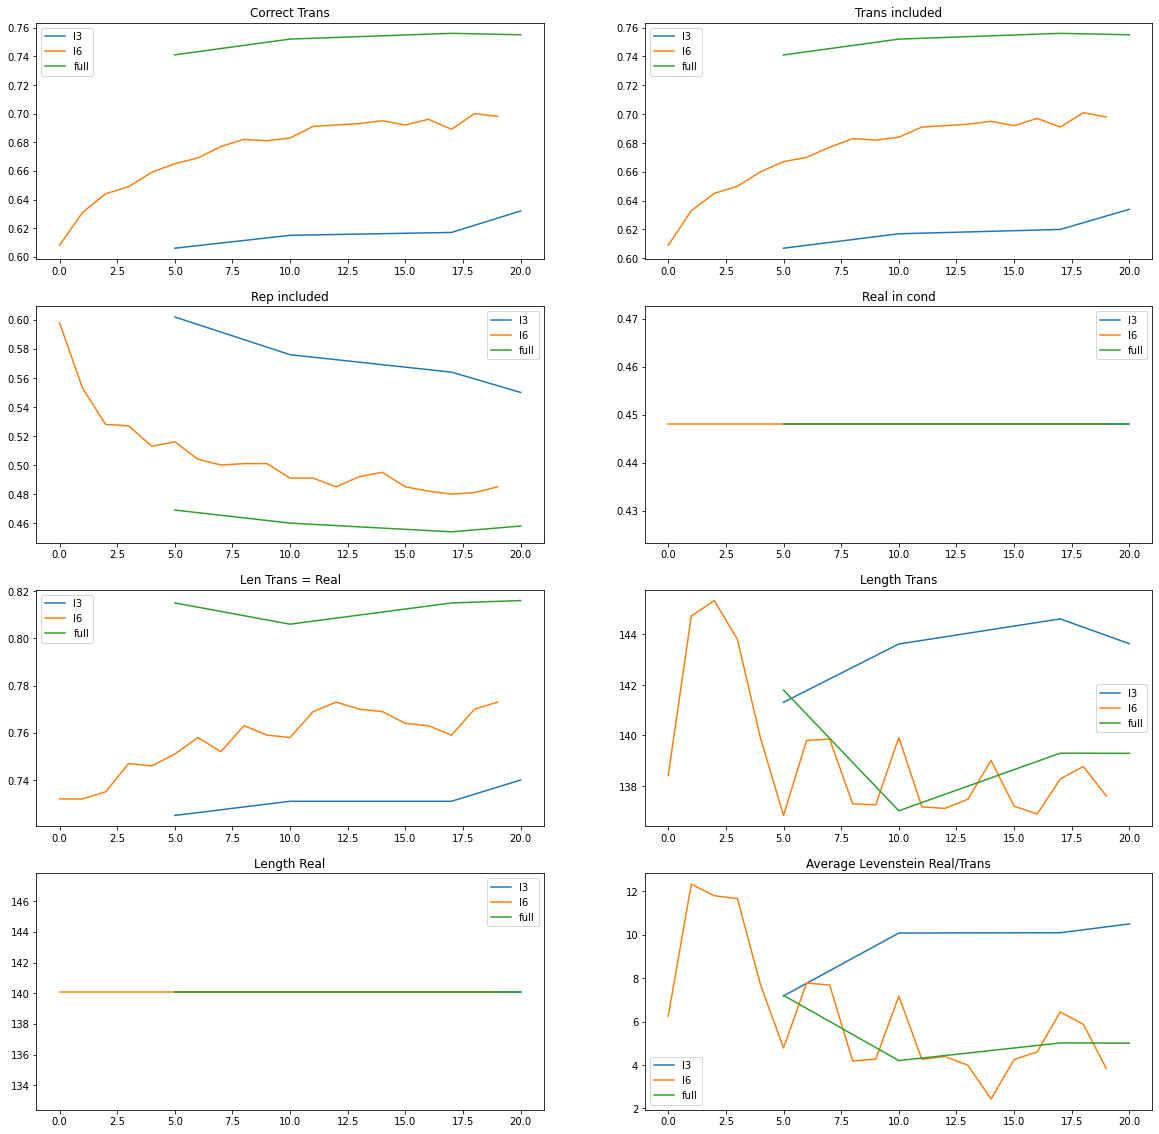

In [13]:
format_reloads_dataset(l3,l6,lf,"test_nf_long")

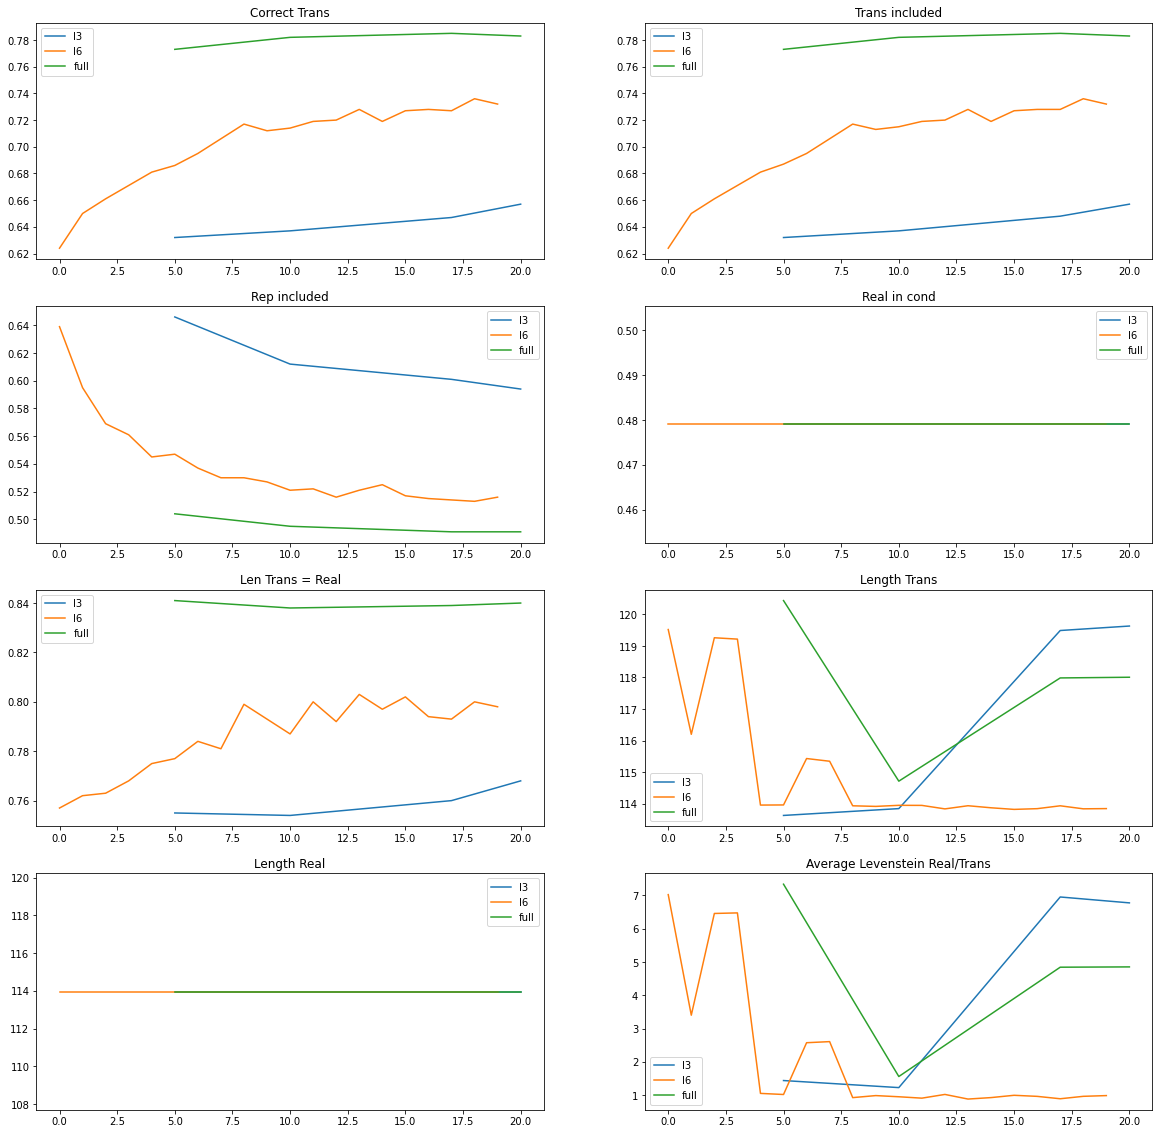

In [14]:
format_reloads_dataset(l3,l6,lf,"test_nf_700")